# **Data-Driven Customer Segmentation for Online Retail Store Using Clustering Techniques**

# **Goal of the Project**
The goal is to segment customers based on purchasing behavior for a UK-based online retail store, using clustering algorithms to uncover meaningful groups.

**Objectives:**

* Analyze transactional data to understand customer behavior.
* Apply clustering algorithms (K-Means, Agglomerative, DBSCAN) to identify customer segments.
* Evaluate clusters using Silhouette score and Davies-Bouldin index.

**Output:**

Customer segments and actionable insights.

**Key Metrics:**

* Silhouette Score: Measures cluster cohesion and separation.
* Davies-Bouldin Index: Assesses cluster similarity; lower values are better.
* Cluster Count: Number of customer segments identified.




# **Introduction**
In the competitive world of e-commerce, understanding customer behavior is essential for optimizing marketing strategies and increasing profitability. This project focuses on customer segmentation for a UK-based online retail store using the "Online Retail" dataset from the UCI Machine Learning Repository. The dataset covers transactions from 2010 to 2011 and includes key details such as purchase frequency, recency, and spending amounts.

By applying clustering techniques like K-Means, Agglomerative Clustering, and DBSCAN, the project identifies distinct customer segments based on their purchasing behaviors. The insights from this analysis will help the business create targeted marketing campaigns, improve customer retention, and optimize inventory management, ultimately driving growth and enhancing customer satisfaction.

# **Data Story**

[Customer Segmentation Dataset](https://docs.google.com/spreadsheets/d/13MZp0G2rVA4-ogIAx99GI12KXGpHliPX/edit?usp=sharing&ouid=108296935564377927140&rtpof=true&sd=true)

This project uses a real-world dataset sourced from the UCI Machine Learning Repository titled "Online Retail."

The data captures over 500,000 transactions made between December 2010 and December 2011 by a UK-based online retail company specializing in unique all-occasion gifts.

The company's customer base consists of both individual shoppers and wholesalers, making segmentation essential for targeted marketing strategies.

**The Dataset**

The dataset includes the following key features:

**InvoiceNo**: Unique invoice identifier for each transaction

**StockCode**: Unique product identifier

**Description**: Product description

**Quantity**: Number of items purchased

**InvoiceDate**: Date and time of purchase

**UnitPrice**: Price per unit of product

**CustomerID**: Unique customer identifier

**Country**: Customer's country of origin

With a total of 541,909 instances and 6 primary features, the dataset provides rich insights for customer segmentation.



**Importing Libraries**

In [703]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib

import warnings
warnings.filterwarnings("ignore")


# **Data Understanding**

In [704]:
# Load the Dataset
data = pd.read_excel('/content/Online Retail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [705]:
# 1. Basic Data Exploration
print("Shape of the dataset:", data.shape)

Shape of the dataset: (541909, 8)


In [706]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [707]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [708]:
# Convert columns to correct datatypes
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['StockCode'] = data['StockCode'].astype(str)
data['Description'] = data['Description'].astype(str)
data['Quantity'] = data['Quantity'].astype(float)  # or int if the data is whole numbers
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')  # Convert to datetime
data['UnitPrice'] = data['UnitPrice'].astype(float)
data['CustomerID'] = data['CustomerID'].astype(str)  # or int if numeric IDs
data['Country'] = data['Country'].astype(str)


# **Data Preprocessing**

In [709]:
# Handling Missing Values
data = data.dropna(subset=['CustomerID'])  # Retain rows with CustomerID

In [710]:
# Remove rows where Quantity <= 0 or UnitPrice <= 0
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]


In [711]:
# Handling Duplicates
data.drop_duplicates(inplace=True)

In [712]:
data.shape

(524878, 8)

In [713]:
# Feature Engineering: Calculate Total Price per transaction
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [714]:
data.shape

(524878, 9)

In [715]:
# Step 3: Aggregate at CustomerID Level
customer_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'count',  # Transaction count
    'Quantity': 'sum',     # Total quantity purchased
    'TotalPrice': 'sum',   # Total spending
    'Description': 'nunique',  # Unique product descriptions
}).rename(columns={
    'InvoiceNo': 'TransactionCount',
    'Description': 'UniqueProductsPurchased'
})


# Verify if any CustomerID is NaN after aggregation
if customer_data.index.isna().any():
    print("Warning: NaN CustomerID found in aggregated data!")
    customer_data = customer_data[~customer_data.index.isna()]

print("Aggregated Customer Data:")
print(customer_data.head())

Aggregated Customer Data:
            TransactionCount  Quantity  TotalPrice  UniqueProductsPurchased
CustomerID                                                                 
12346.0                    1   74215.0    77183.60                        1
12347.0                  182    2458.0     4310.00                      103
12348.0                   31    2341.0     1797.24                       22
12349.0                   73     631.0     1757.55                       73
12350.0                   17     197.0      334.40                       17


In [716]:
customer_data.shape

(4339, 4)

In [717]:
customer_data

,TransactionCount,Quantity,TotalPrice,UniqueProductsPurchased
CustomerID,,,,
12346.0,1,74215.0,77183.60,1
12347.0,182,2458.0,4310.00,103
12348.0,31,2341.0,1797.24,22
12349.0,73,631.0,1757.55,73
12350.0,17,197.0,334.40,17
...,...,...,...,...
18281.0,7,54.0,80.82,7
18282.0,12,103.0,178.05,12
18283.0,721,1357.0,2045.53,272


In [718]:
# Step 4: One-Hot Encode the 'Country' Column
country_encoded = pd.get_dummies(data[['CustomerID', 'Country']], columns=['Country'])


In [719]:
# Step 5: Aggregate Country Encoding at CustomerID Level
country_encoded = country_encoded.groupby('CustomerID').sum()

In [720]:
# Step 6: Merge Encoded Country Data with Aggregated Customer Data
customer_data = customer_data.merge(country_encoded, left_index=True, right_index=True, how='left')

In [721]:
# Step 7: Reset Index for Final Output
customer_data.reset_index(inplace=True)

In [722]:
# Display Processed Customer Data
print(customer_data.head())

  CustomerID  TransactionCount  Quantity  TotalPrice  UniqueProductsPurchased  \
0    12346.0                 1   74215.0    77183.60                        1   
1    12347.0               182    2458.0     4310.00                      103   
2    12348.0                31    2341.0     1797.24                       22   
3    12349.0                73     631.0     1757.55                       73   
4    12350.0                17     197.0      334.40                       17   

   Country_Australia  Country_Austria  Country_Bahrain  Country_Belgium  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                0   
4                  0                0                0                0   

   Country_Brazil  ...  Country_RSA  Country_Saudi Arabia  Cou

In [723]:
# Outlier Removal

# Identify numerical columns for IQR-based outlier detection
num_cols = ['TransactionCount', 'Quantity', 'TotalPrice', 'UniqueProductsPurchased']

# Compute Q1, Q3, and IQR for each numerical column
Q1 = customer_data[num_cols].quantile(0.25)
Q3 = customer_data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
is_outlier = (customer_data[num_cols] < (Q1 - 1.5 * IQR)) | (customer_data[num_cols] > (Q3 + 1.5 * IQR))

# Remove rows with outliers in any numerical column
customer_data = customer_data[~is_outlier.any(axis=1)]

# Reset index after outlier removal
customer_data.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
print("Shape of Customer Data after Outlier Removal:", customer_data.shape)
print(customer_data.head())


Shape of Customer Data after Outlier Removal: (3700, 43)
  CustomerID  TransactionCount  Quantity  TotalPrice  UniqueProductsPurchased  \
0    12349.0                73     631.0     1757.55                       73   
1    12350.0                17     197.0      334.40                       17   
2    12352.0                85     536.0     2506.04                       59   
3    12353.0                 4      20.0       89.00                        4   
4    12354.0                58     530.0     1079.40                       58   

   Country_Australia  Country_Austria  Country_Bahrain  Country_Belgium  \
0                  0                0                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                4                0   
4                  0                0                0                0   

   Co

In [724]:
customer_data.shape

(3700, 43)

In [725]:
# Scaling the Data

# Identify numerical columns for scaling
num_cols = ['TransactionCount', 'Quantity', 'TotalPrice', 'UniqueProductsPurchased']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
customer_data_scaled = customer_data.copy()  # Keep original data intact
customer_data_scaled[num_cols] = scaler.fit_transform(customer_data[num_cols])

# Display the scaled data
print("Scaled Customer Data:")
print(customer_data_scaled)


Scaled Customer Data:
     CustomerID  TransactionCount  Quantity  TotalPrice  \
0       12349.0          0.549482  0.367722    1.278765   
1       12350.0         -0.695994 -0.589838   -0.623187   
2       12352.0          0.816370  0.158118    2.279076   
3       12353.0         -0.985122 -0.980364   -0.951149   
4       12354.0          0.215872  0.144880    0.372459   
...         ...               ...       ...         ...   
3695    18278.0         -0.873919 -0.878871   -0.837685   
3696    18280.0         -0.851678 -0.925205   -0.828731   
3697    18281.0         -0.918400 -0.905348   -0.962081   
3698    18282.0         -0.807197 -0.797236   -0.832139   
3699    18287.0          0.482760  2.474796    1.385319   

      UniqueProductsPurchased  Country_Australia  Country_Austria  \
0                    0.902279                  0                0   
1                   -0.672320                  0                0   
2                    0.508629                  0              

# **Exploratory Data Analysis**

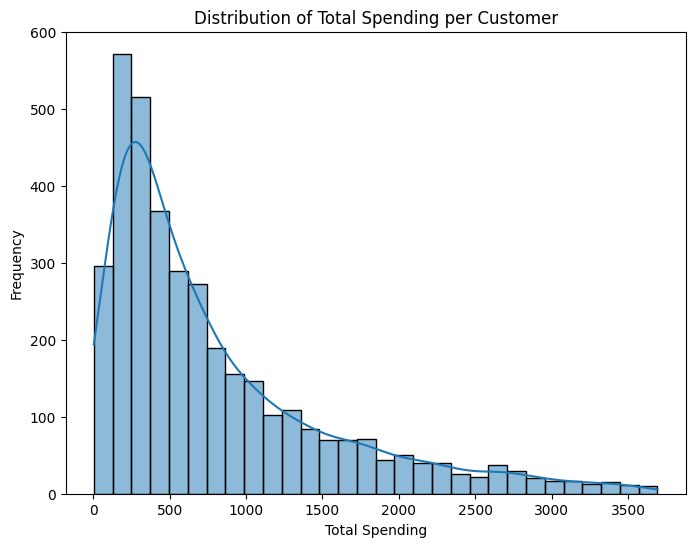

In [726]:
# 1. Distribution of Total Spending
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['TotalPrice'], bins=30, kde=True)
plt.title("Distribution of Total Spending per Customer")
plt.xlabel("Total Spending")
plt.ylabel("Frequency")
plt.show()

**Observations:**

* **Right-Skewed Distribution:** The histogram shows a right-skewed distribution, meaning most customers have lower total spending, as indicated by the peak in the lower spending bins (e.g., 0–500 range).
A smaller number of customers have higher total spending, as shown by the gradual decline of the bars toward the right.

* **Frequency of Total Spending:** The highest frequency is observed for customers spending below 500. This implies that most customers contribute smaller amounts of revenue.
As spending increases (e.g., above 1000), the number of customers contributing to this range decreases significantly.

* **Long Tail:** There is a long tail extending toward the higher total spending values (e.g., above 2000). These customers could represent high-value customers who contribute significantly to overall revenue.

**Business Insight:**

* **High-Value Customers:** The customers in the higher spending range (e.g., above 1500) may represent a critical segment for the business. They could be targeted for loyalty programs or exclusive offers.

* **Revenue Distribution:** While the majority of customers contribute small amounts, the long tail suggests that a small group of customers likely accounts for a share of revenue.


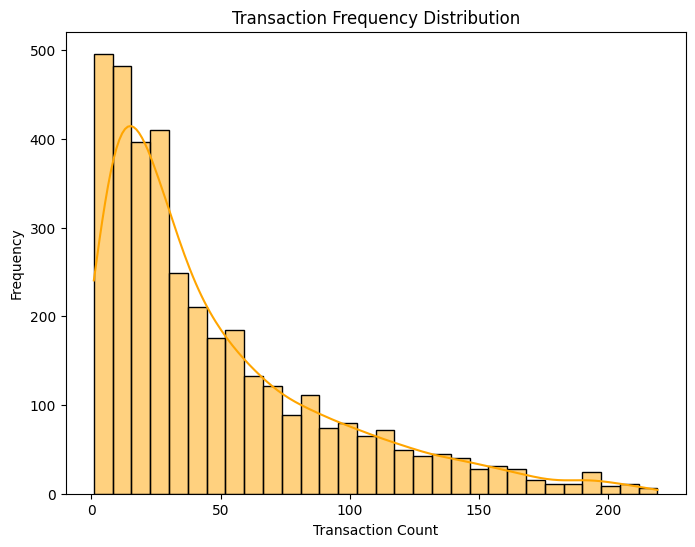

In [727]:
# 2. Transaction Frequency Distribution
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['TransactionCount'], bins=30, kde=True, color='orange')
plt.title("Transaction Frequency Distribution")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.show()

**Observations:**

* **Right-Skewed Distribution:** The histogram is heavily skewed to the right. Most customers have a low number of transactions, as indicated by the peak in the lower transaction count bins (e.g., 0–20 transactions).
Very few customers have high transaction counts (above 100 transactions).

* **Majority of Customers:** The majority of customers fall into the lower transaction count range (e.g., fewer than 50 transactions). This suggests that a significant portion of customers engage infrequently with the business.

* **Long Tail:** A small proportion of customers have much higher transaction counts, as indicated by the tail stretching towards the higher transaction bins. These might represent highly loyal or repeat customers.

**Business Insight:**

* **Customer Segmentation:** This distribution can help segment customers into low-frequency and high-frequency transaction groups. High-frequency customers might require special attention, such as loyalty rewards, as they contribute more significantly to the business.

* **Marketing Focus:** Efforts could be made to convert low-frequency customers into repeat buyers through targeted promotions or incentives.

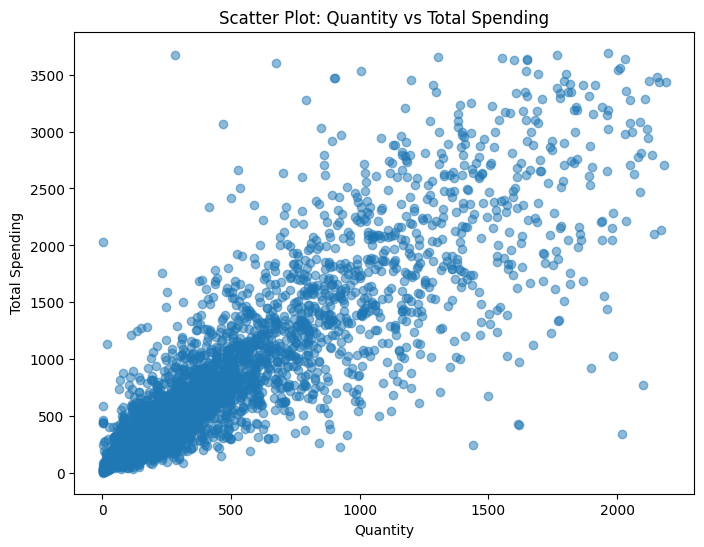

In [728]:
# 3. Scatter Plot: Quantity vs Total Spending
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['Quantity'], customer_data['TotalPrice'], alpha=0.5)
plt.title("Scatter Plot: Quantity vs Total Spending")
plt.xlabel("Quantity")
plt.ylabel("Total Spending")
plt.show()

The scatter plot indicates:

* **Positive Correlation**: The graph shows a general trend of increasing total spending as the quantity increases.

* **Clusters of Points**: There appears to be a dense cluster of points near the origin, where both the quantity and total spending are relatively low. This could represent customers with fewer transactions or smaller purchases.
The points are more spread out as quantity and spending increase, indicating variability in spending patterns for larger quantities.

* **Outliers**: A few points are isolated farther away from the main cluster. These might represent customers who made unusually large purchases or outlier transactions, which could be worth investigating further during data preprocessing or analysis.

**Business Insight:**

* Customers with high quantities and high total spending are likely high-value customers. Segmenting these customers might reveal important behavioral patterns or preferences.
* Conversely, low-quantity, low-spending customers could represent occasional buyers or those with minimal engagement.

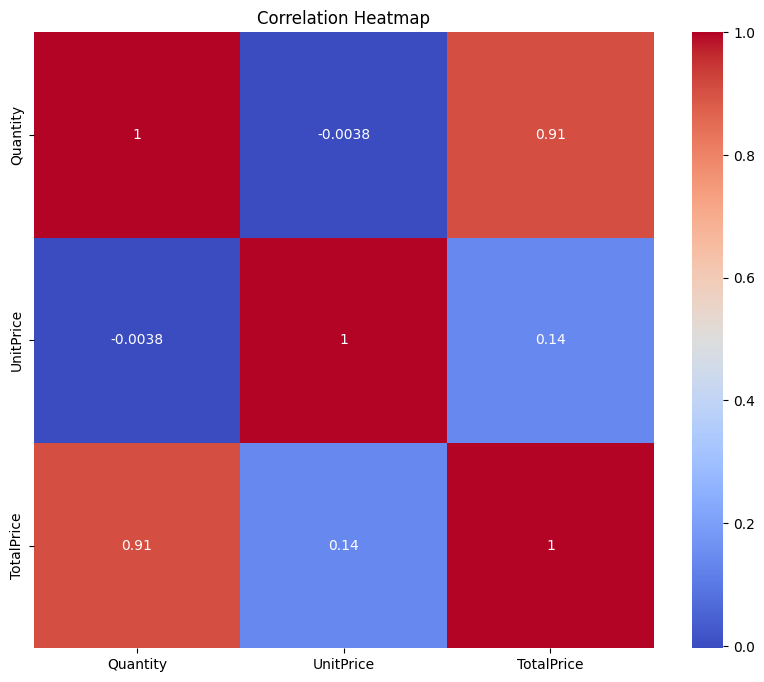

In [729]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric = data.select_dtypes(include=[np.number])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Observations**

* There is a strong positive correlation (close to 1) between Quantity and Total Price.

* This indicates that as the quantity of items purchased increases, the total price also increases. This is expected, as Total Price is typically calculated as Quantity × Unit Price.

* There is a weak positive correlation between Unit Price and Total Price.

* This suggests that changes in unit price have little direct impact on the total price, as total price is more influenced by the quantity purchased.

* The correlation between Quantity and Unit Price is nearly zero (very close to 0), which indicates no relationship between these variables.
This suggests that the number of items purchased does not depend on the price per unit, at least in this dataset.

**Business Insight:**

* The strong dependence of Total Price on Quantity can be used to predict total spending based on sales volume.

* The weak influence of Unit Price suggests that price adjustments might not heavily affect total revenue unless they significantly alter purchasing behavior.

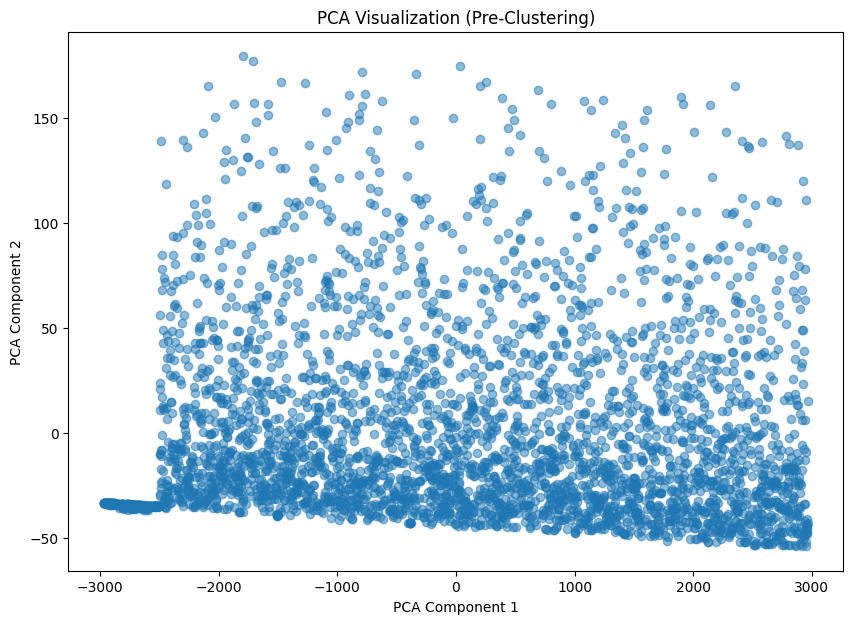

In [730]:
# PCA Visualization
from sklearn.decomposition import PCA
# Visualizations Before Clustering
pca = PCA(n_components=2)
data_pca = pca.fit_transform(customer_data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title("PCA Visualization (Pre-Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# **Clustering and Evaluation**

In [731]:
# Clustering and Evaluation
evaluation_results = []

**KMeans Clustering**

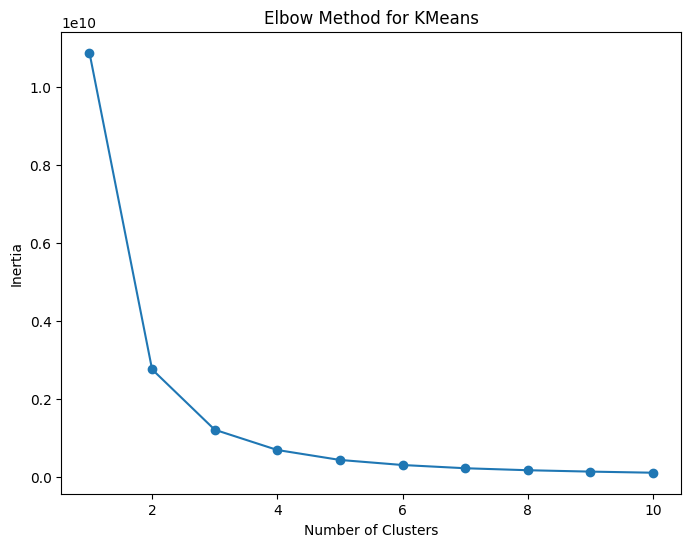

In [732]:
# 1. KMeans Clustering
# Elbow Method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(customer_data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Optimal value for number of clusters is 3.

In [733]:
# Initial Model
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['KMeans_Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Evaluate KMeans Before Tuning
kmeans_silhouette = silhouette_score(customer_data_scaled, kmeans.labels_)
kmeans_davies = davies_bouldin_score(customer_data_scaled, kmeans.labels_)

# Hyperparameter Tuning for KMeans
optimal_k = 3  # Replace based on the Elbow Method
kmeans_tuned = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['KMeans_Cluster_Tuned'] = kmeans_tuned.fit_predict(customer_data_scaled)

# Evaluate KMeans After Tuning
kmeans_tuned_silhouette = silhouette_score(customer_data_scaled, kmeans_tuned.labels_)
kmeans_tuned_davies = davies_bouldin_score(customer_data_scaled, kmeans_tuned.labels_)

evaluation_results.append({
    'Algorithm': 'KMeans',
    'Before Silhouette': kmeans_silhouette,
    'After Silhouette': kmeans_tuned_silhouette,
    'Before Davies-Bouldin': kmeans_davies,
    'After Davies-Bouldin': kmeans_tuned_davies
})

In [734]:
# Cluster Profiling
cluster_profile = customer_data.groupby('KMeans_Cluster_Tuned').agg({
    'TransactionCount': ['mean', 'median'],
    'Quantity': ['mean', 'median'],
    'TotalPrice': ['mean', 'median', 'sum']
}).reset_index()

print("Cluster Profiling:")
print(cluster_profile)

Cluster Profiling:
  KMeans_Cluster_Tuned TransactionCount           Quantity         TotalPrice  \
                                   mean median        mean median        mean   
0                    0        48.930120   32.0  450.387952  295.0  789.075463   
1                    1        48.457352   32.0  428.841592  265.0  722.883517   
2                    2        47.482026   32.0  514.218954  327.5  890.798792   

                         
    median          sum  
0  533.300   982398.952  
1  460.590   889869.610  
2  618.395  1090337.722  


This profiling shows the characteristics of clusters created by the KMeans algorithm.

**Key Metrics:**

* **TransactionCount:** The number of transactions made by customers in each cluster.

* **Quantity:** The total number of items purchased by customers in each cluster.

* **TotalPrice:** The total spending of customers in each cluster.

**Clusters Explanation:**

**Cluster 0:**

* Average transaction count = 48.93

* Average quantity purchased = 450.39

* Average total spending = 789.08

* This cluster represents customers with moderately high transaction frequency and moderate spending.

**Cluster 1:**

* Similar to Cluster 0, but slightly lower in quantity and spending.

**Cluster 2:**

* Customers in this cluster purchase more items (average 514.22) and have the highest spending (mean = 890.80).

* They may represent high-value customers.

Cluster assignments saved to 'customer_clusters.csv'.


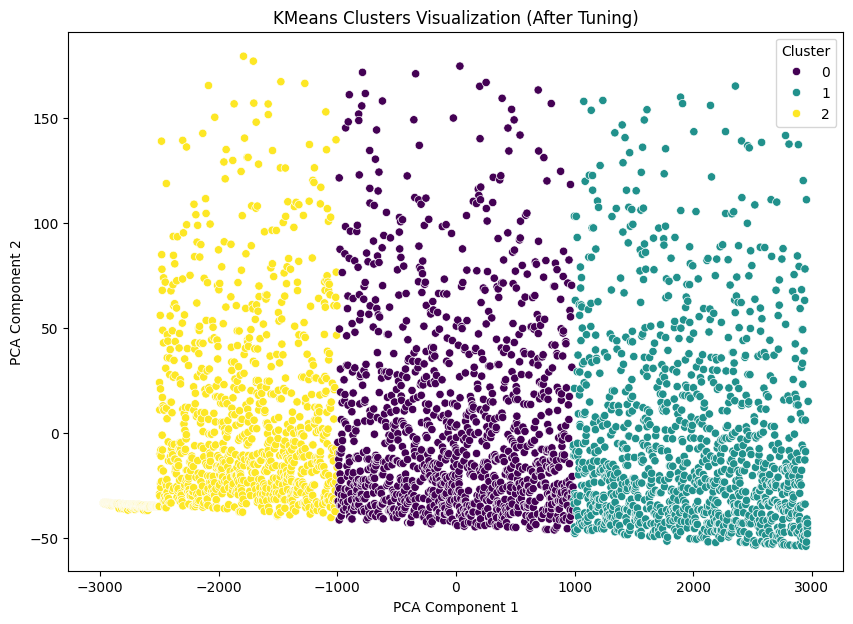

In [735]:
# Export Cluster Assignments
customer_data.to_csv("customer_clusters.csv", index=False)
print("Cluster assignments saved to 'customer_clusters.csv'.")

# Visualizing Clusters with PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=customer_data['KMeans_Cluster_Tuned'], palette='viridis')
plt.title("KMeans Clusters Visualization (After Tuning)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In this plot:

* X-axis: Represents PCA Component 1 — a reduced dimension of your data.

* Y-axis: Represents PCA Component 2.

* Each colored cluster represents a group of customers segmented by the K-Means clustering algorithm.

**Cluster Descriptions:**

**Purple Cluster (Cluster 0):**

* Represents one customer segment.

* This cluster is densely packed, suggesting that customers in this group share similar purchasing behavior.

**Blue Cluster (Cluster 1):**

* This cluster is spread across the right side of the plot, indicating customers with different characteristics from those in the purple cluster.

**Yellow Cluster (Cluster 2):**

* Spread across the left side, similar in density to the blue cluster.

* Customers in this group are distinct from other clusters.

**Insights:**

* **Clear Separation:**
The clusters are well-separated, indicating that the algorithm has successfully segmented customers into distinct groups.

**Customer Segmentation:**

* Cluster 0 (Purple): Likely contains moderate or regular buyers based on its centralized nature.

* Cluster 1 (Blue): May represent higher-spending or bulk-buying customers given its spread on the right.

* Cluster 2 (Yellow): Potentially low-frequency or different types of customers compared to others.

**Agglomerative Clustering**

In [736]:
# Agglomerative Clustering Evaluation Before Tuning
agg_scores = []
for n_clusters in range(2, 6):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(customer_data_scaled)
    silhouette_avg = silhouette_score(customer_data_scaled, labels)
    try:
        davies_index = davies_bouldin_score(customer_data_scaled, labels)
    except ValueError:
        davies_index = 'NA'
    agg_scores.append({'n_clusters': n_clusters, 'Silhouette': silhouette_avg, 'Davies-Bouldin': davies_index})

# Select Optimal n_clusters
optimal_agg_clusters = max(agg_scores, key=lambda x: x['Silhouette'])['n_clusters']

# Agglomerative Clustering After Tuning
agg_tuned = AgglomerativeClustering(n_clusters=optimal_agg_clusters)
customer_data['Agglomerative_Cluster_Tuned'] = agg_tuned.fit_predict(customer_data_scaled)

agg_tuned_silhouette = silhouette_score(customer_data_scaled, customer_data['Agglomerative_Cluster_Tuned'])
agg_tuned_davies = davies_bouldin_score(customer_data_scaled, customer_data['Agglomerative_Cluster_Tuned'])

evaluation_results.append({
    'Algorithm': 'Agglomerative',
    'Before Silhouette': max(agg_scores, key=lambda x: x['Silhouette'])['Silhouette'],
    'After Silhouette': agg_tuned_silhouette,
    'Before Davies-Bouldin': min(x['Davies-Bouldin'] for x in agg_scores if x['Davies-Bouldin'] != 'NA'),
    'After Davies-Bouldin': agg_tuned_davies
})


In [737]:
# Cluster Profiling for Agglomerative Clustering
agg_profile = customer_data.groupby('Agglomerative_Cluster_Tuned').agg({
    'TransactionCount': ['mean', 'median'],
    'Quantity': ['mean', 'median'],
    'TotalPrice': ['mean', 'median', 'sum']
}).reset_index()

print("Agglomerative Clustering Profiling:")
print(agg_profile)


Agglomerative Clustering Profiling:
  Agglomerative_Cluster_Tuned TransactionCount           Quantity         \
                                          mean median        mean median   
0                           0        47.679888   31.0  482.045730  312.0   
1                           1        49.138728   33.0  439.959538  281.0   

   TotalPrice                       
         mean  median          sum  
0  840.668942  578.94  1801553.543  
1  745.698613  490.33  1161052.741  


**Clusters Explanation:**

**Cluster 0:**

* Average spending (mean TotalPrice) = 840.67
Slightly higher average quantity and spending than Cluster 1.

**Cluster 1:**

* Lower spending compared to Cluster 0 but higher transaction counts.

* This suggests two customer segments: one with slightly higher spending and one with lower spending.

In [738]:
# Export Cluster Assignments for Agglomerative Clustering
customer_data.to_csv("agglomerative_clusters.csv", index=False)
print("Agglomerative Clustering assignments saved to 'agglomerative_clusters.csv'.")


Agglomerative Clustering assignments saved to 'agglomerative_clusters.csv'.


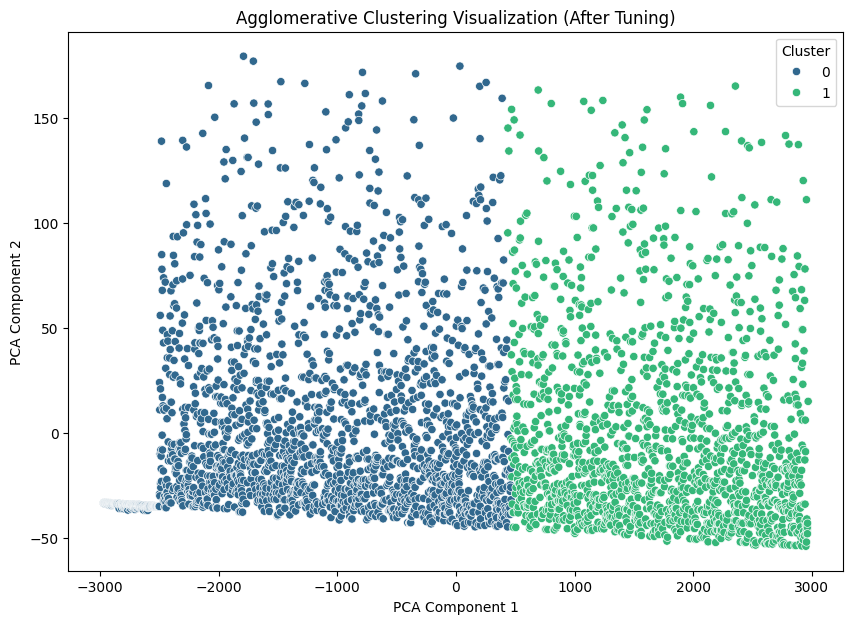

In [739]:
# Visualizing Clusters with PCA for Agglomerative Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=customer_data['Agglomerative_Cluster_Tuned'],
    palette='viridis',
    legend='full'
)
plt.title("Agglomerative Clustering Visualization (After Tuning)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In this plot:

* X-axis: Represents PCA Component 1.

* Y-axis: Represents PCA Component 2.

**Clusters:**

* Blue Cluster (Cluster 0): Represents one set of customers.

* Green Cluster (Cluster 1): Represents a different set of customers.

**Cluster Descriptions:**

**Blue Cluster (Cluster 0):**

* Larger in size and spread across more of the plot, indicating that this group contains more customers.

* The distribution suggests these customers may have a broader range of purchasing behaviors.

**Green Cluster (Cluster 1):**

* Located on the right side and tightly grouped compared to the blue cluster.

* These customers may represent a more homogeneous group with similar shopping patterns.

**Insights:**

* **Separation of Clusters:**
Agglomerative clustering has divided the customers into two distinct groups.

**Customer Behavior:**

* Cluster 0 (Blue) may represent customers with diverse transaction patterns, potentially including occasional and frequent buyers.

* Cluster 1 (Green) may consist of a more consistent customer segment, potentially high-volume buyers or regular shoppers.



**DBSCAN Clustering**

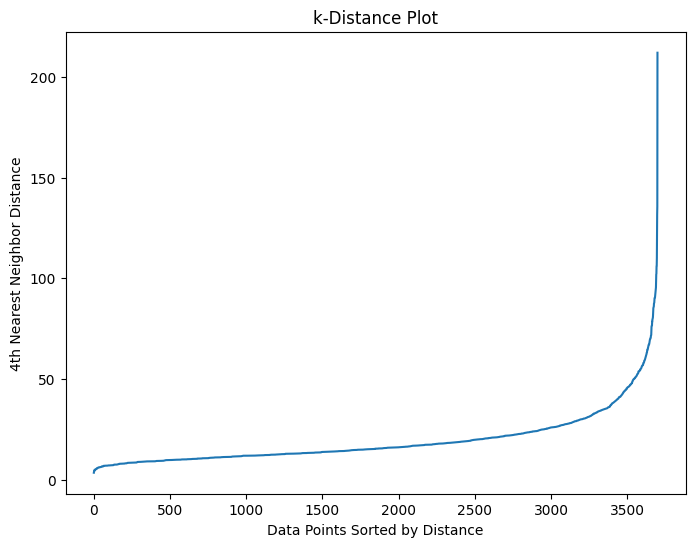

In [740]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)  # min_samples = 5
neighbors_fit = neighbors.fit(customer_data_scaled)
distances, indices = neighbors_fit.kneighbors(customer_data_scaled)

distances = np.sort(distances[:, 4])  # 4th neighbor (index 4 for 5 neighbors)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Plot")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


The elbow seems to appear around a y-value between 50 and 100, suggesting this could be a good starting point for ε.

So we can try the values in this range.

In [741]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN

# DBSCAN Evaluation Before Tuning
dbscan_scores = []

# Try different eps values and min_samples for tuning
eps_values = [50, 75, 100, 125]
min_samples = 4

for eps in eps_values:
    # Initialize DBSCAN with current eps and min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit DBSCAN and get cluster labels
    labels = dbscan.fit_predict(customer_data_scaled)

    # Check unique labels (clusters vs noise)
    unique_labels = set(labels)
    print(f"eps = {eps}, unique labels = {unique_labels}")

    if len(unique_labels) > 1:  # Exclude cases where DBSCAN found only noise (-1) or a single cluster
        try:
            # Compute Silhouette score and Davies-Bouldin index
            silhouette_avg = silhouette_score(customer_data_scaled, labels)
            davies_index = davies_bouldin_score(customer_data_scaled, labels)
            dbscan_scores.append({
                'eps': eps,
                'Silhouette': silhouette_avg,
                'Davies-Bouldin': davies_index
            })
        except ValueError:
            # If clustering is invalid (e.g., all points are in one cluster), assign 'NA'
            dbscan_scores.append({'eps': eps, 'Silhouette': None, 'Davies-Bouldin': 'NA'})
    else:
        # If all points are noise for this eps, print a warning
        print(f"Warning: All points are noise for eps = {eps}")

# Filter valid scores before selecting optimal eps
valid_silhouette_scores = [s for s in dbscan_scores if s['Silhouette'] is not None]
valid_davies_scores = [s for s in dbscan_scores if s['Davies-Bouldin'] != 'NA']

# Select Optimal eps based on the silhouette score (maximize)
optimal_eps = max(valid_silhouette_scores, key=lambda x: x['Silhouette'])['eps'] if valid_silhouette_scores else None

# DBSCAN After Tuning
if optimal_eps is not None:
    # Re-run DBSCAN with the optimal eps
    dbscan_tuned = DBSCAN(eps=optimal_eps, min_samples=min_samples)
    customer_data['DBSCAN_Cluster_Tuned'] = dbscan_tuned.fit_predict(customer_data_scaled)

    # Check if DBSCAN found valid clusters
    unique_labels_tuned = set(customer_data['DBSCAN_Cluster_Tuned'])
    print(f"After tuning (eps = {optimal_eps}), unique labels: {unique_labels_tuned}")

    # Only compute silhouette and Davies-Bouldin if clusters are valid
    if len(unique_labels_tuned) > 1:
        dbscan_tuned_silhouette = silhouette_score(customer_data_scaled, customer_data['DBSCAN_Cluster_Tuned'])
        dbscan_tuned_davies = davies_bouldin_score(customer_data_scaled, customer_data['DBSCAN_Cluster_Tuned'])
    else:
        dbscan_tuned_silhouette = 'NA'
        dbscan_tuned_davies = 'NA'
else:
    dbscan_tuned_silhouette = 'NA'
    dbscan_tuned_davies = 'NA'

# Only append to evaluation results if there are valid scores
if valid_silhouette_scores and valid_davies_scores:
    evaluation_results.append({
        'Algorithm': 'DBSCAN',
        'Before Silhouette': max(valid_silhouette_scores, key=lambda x: x['Silhouette'])['Silhouette'],
        'After Silhouette': dbscan_tuned_silhouette,
        'Before Davies-Bouldin': min(valid_davies_scores, key=lambda x: x['Davies-Bouldin'])['Davies-Bouldin'],
        'After Davies-Bouldin': dbscan_tuned_davies
    })

# Optionally, print evaluation results (this could be saved/exported later)
print("DBSCAN Evaluation Results:", evaluation_results)


eps = 50, unique labels = {0, -1}
eps = 75, unique labels = {0, -1}
eps = 100, unique labels = {0, -1}
eps = 125, unique labels = {0, -1}
After tuning (eps = 75), unique labels: {0, -1}
DBSCAN Evaluation Results: [{'Algorithm': 'KMeans', 'Before Silhouette': 0.5874921295865657, 'After Silhouette': 0.5874921295865657, 'Before Davies-Bouldin': 0.502076422104214, 'After Davies-Bouldin': 0.502076422104214}, {'Algorithm': 'Agglomerative', 'Before Silhouette': 0.6061274572725979, 'After Silhouette': 0.6061274572725979, 'Before Davies-Bouldin': 0.5042458355885686, 'After Davies-Bouldin': 0.5074627913879439}, {'Algorithm': 'DBSCAN', 'Before Silhouette': 0.1618218009098442, 'After Silhouette': 0.1618218009098442, 'Before Davies-Bouldin': 1.8808818228809587, 'After Davies-Bouldin': 1.8808818228809587}]


DBSCAN Profiling:
  DBSCAN_Cluster_Tuned TransactionCount            Quantity         \
                                   mean median         mean median   
0                   -1       129.545455  129.0  1008.818182  967.0   
1                    0        48.051504   32.0   462.711846  295.0   

    TotalPrice                        
          mean   median          sum  
0  1987.765455  1934.66    21865.420  
1   797.164777   534.24  2940740.864  
DBSCAN assignments saved to 'dbscan_clusters.csv'.


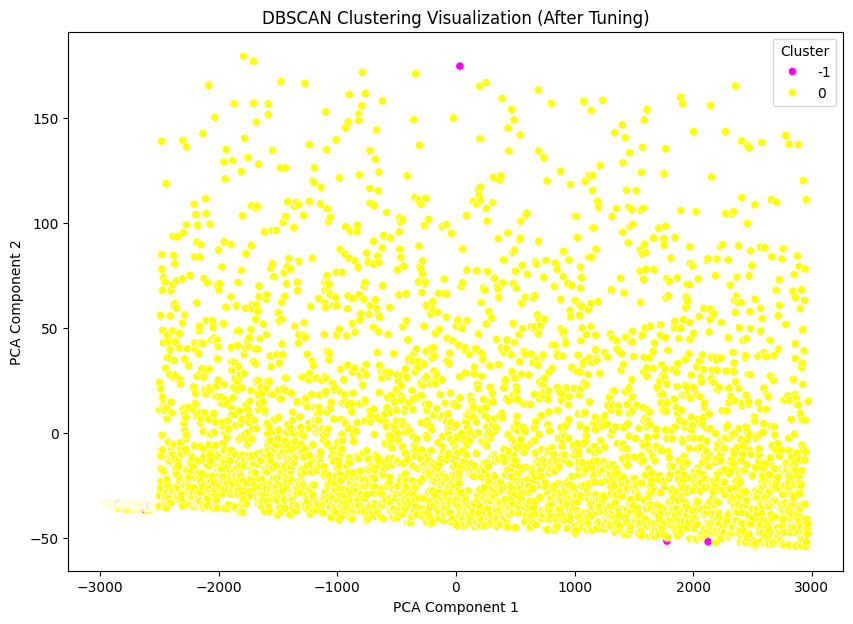

In [742]:
# Cluster Profiling for DBSCAN
if optimal_eps is not None and 'DBSCAN_Cluster_Tuned' in customer_data:
    # Check if there are valid clusters (excluding noise cluster -1)
    if len(set(customer_data['DBSCAN_Cluster_Tuned'])) > 1:
        dbscan_profile = customer_data.groupby('DBSCAN_Cluster_Tuned').agg({
            'TransactionCount': ['mean', 'median'],
            'Quantity': ['mean', 'median'],
            'TotalPrice': ['mean', 'median', 'sum']
        }).reset_index()

        print("DBSCAN Profiling:")
        print(dbscan_profile)

        # Export Cluster Assignments for DBSCAN
        customer_data.to_csv("dbscan_clusters.csv", index=False)
        print("DBSCAN assignments saved to 'dbscan_clusters.csv'.")

        # Visualizing Clusters with PCA for DBSCAN
        plt.figure(figsize=(10, 7))
        sns.scatterplot(
            x=data_pca[:, 0],
            y=data_pca[:, 1],
            hue=customer_data['DBSCAN_Cluster_Tuned'],
            palette='spring',
            legend='full'
        )
        plt.title("DBSCAN Clustering Visualization (After Tuning)")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.legend(title="Cluster")
        plt.show()
    else:
        print("No valid clusters found for DBSCAN. Skipping profiling and visualization.")
else:
    print("No valid clusters found for DBSCAN. Skipping profiling and visualization.")


**DBSCAN Profiling**

* DBSCAN assigns points to clusters or labels them as noise (-1):

**Clusters Explanation:**

* **Cluster -1:**

* * Represents outliers or noise points — customers with unusually high transaction counts (129 on average), high quantities purchased, and high spending (mean TotalPrice = 1987.77).

* **Cluster 0:**

* * Majority of customers with average transaction counts (mean = 48.05), moderate quantities purchased, and spending (mean TotalPrice = 797.16).



**DBSCAN Clustering Details:**

**Cluster 0 (Yellow):**

* The largest group with dense regions satisfying the DBSCAN criteria for forming clusters.
Customers in this cluster have similar behavior patterns or characteristics.

**Cluster -1 (Pink):**

* Represents noise or anomalies, such as customers whose behavior deviates significantly from the main group.
They might have very unique transaction patterns or low similarity to others.

**Insights:**

* **Outliers:**
DBSCAN effectively separates outliers (pink points) from the main customer population (yellow cluster).

* **Customer Segmentation:**
Cluster 0 may represent the core customer base, while the outliers may need further investigation to understand why they don't fit common patterns.

In [743]:
labels = dbscan.fit_predict(customer_data_scaled)
unique_labels = set(labels)
print(f"Unique labels: {unique_labels}")


Unique labels: {0, -1}


# **Evaluation Summary for All Clustering Algorithms**

In [744]:
# Create a DataFrame for Evaluation Results
evaluation_df = pd.DataFrame(evaluation_results)

# Print Evaluation Results
print("Evaluation Summary for All Clustering Algorithms:")
print(evaluation_df)


Evaluation Summary for All Clustering Algorithms:
       Algorithm  Before Silhouette  After Silhouette  Before Davies-Bouldin  \
0         KMeans           0.587492          0.587492               0.502076   
1  Agglomerative           0.606127          0.606127               0.504246   
2         DBSCAN           0.161822          0.161822               1.880882   

   After Davies-Bouldin  
0              0.502076  
1              0.507463  
2              1.880882  


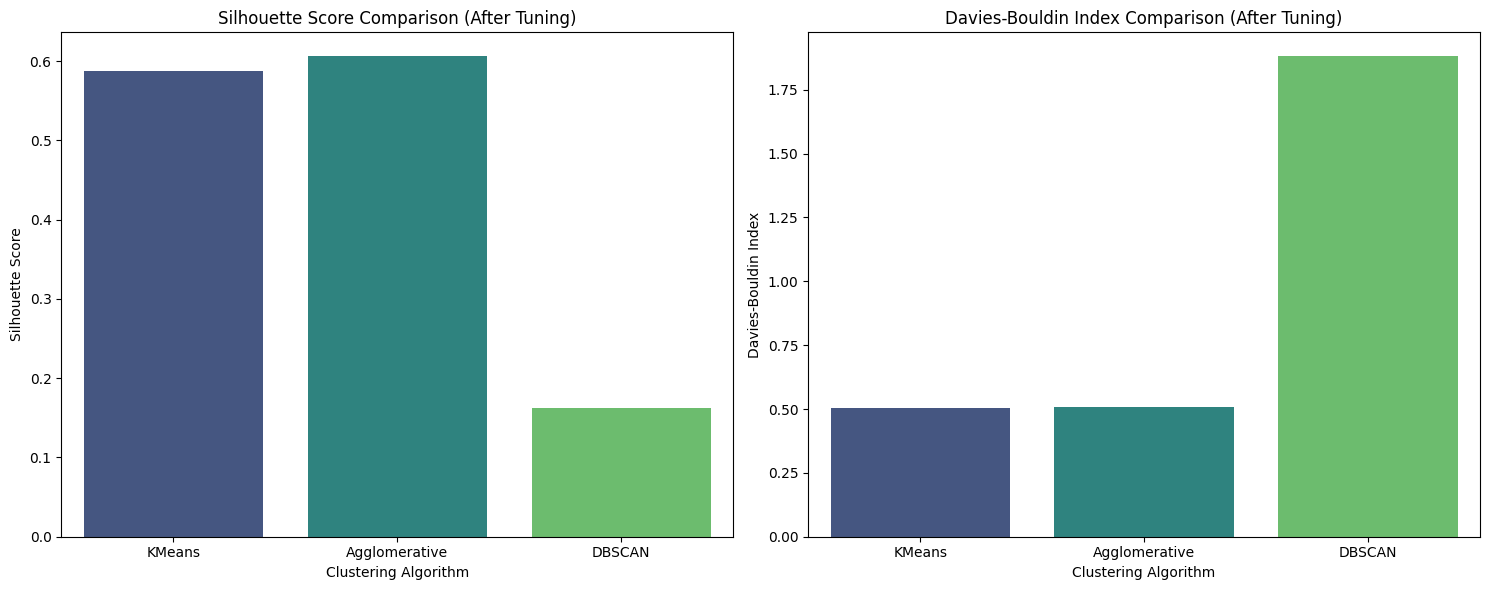

In [745]:
# Plotting the Evaluation Metrics for Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Silhouette Scores Comparison
sns.barplot(data=evaluation_df, x='Algorithm', y='After Silhouette', ax=axes[0], palette='viridis')
axes[0].set_title("Silhouette Score Comparison (After Tuning)")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_xlabel("Clustering Algorithm")

# Davies-Bouldin Scores Comparison
sns.barplot(data=evaluation_df, x='Algorithm', y='After Davies-Bouldin', ax=axes[1], palette='viridis')
axes[1].set_title("Davies-Bouldin Index Comparison (After Tuning)")
axes[1].set_ylabel("Davies-Bouldin Index")
axes[1].set_xlabel("Clustering Algorithm")

plt.tight_layout()
plt.show()


* **Silhouette Score** measures the quality of clustering by evaluating how similar each data point is to its own cluster (cohesion) compared to other clusters (separation).

* * Higher values indicate better-defined clusters.

* **Davies-Bouldin Index** evaluates clustering quality based on the ratio of within-cluster scatter to between-cluster separation.

* * Lower values indicate better clustering performance.

**Observations:**

* Agglomerative Clustering performs the best, with the highest Silhouette Score (~0.6).

* KMeans follows closely, with a slightly lower Silhouette Score.

* DBSCAN has the lowest Silhouette Score, indicating less well-defined clusters.

* KMeans and Agglomerative Clustering show similar performance with low Davies-Bouldin Index values (indicating good clustering quality).

* DBSCAN performs poorly, with the highest Davies-Bouldin Index value (~1.75), suggesting poorly defined clusters.



# **Selecting the Best Algorithm**

In [746]:
# Higher Silhouette Score is better; lower Davies-Bouldin Index is better.
evaluation_df['Silhouette Rank'] = evaluation_df['After Silhouette'].rank(ascending=False)
evaluation_df['Davies-Bouldin Rank'] = evaluation_df['After Davies-Bouldin'].rank(ascending=True)

evaluation_df['Overall Rank'] = evaluation_df['Silhouette Rank'] + evaluation_df['Davies-Bouldin Rank']
best_algorithm = evaluation_df.loc[evaluation_df['Overall Rank'].idxmin(), 'Algorithm']

print(f"The best clustering algorithm based on evaluation metrics is: {best_algorithm}")


The best clustering algorithm based on evaluation metrics is: KMeans


# **Saving the best model**

In [747]:
# Save the Best Model Using Joblib
if best_algorithm == "KMeans":
    joblib.dump(kmeans_tuned, "best_model_kmeans.pkl")
    print("Best model (KMeans) saved as 'best_model_kmeans.pkl'.")
elif best_algorithm == "Agglomerative":
    joblib.dump(agg_tuned, "best_model_agglomerative.pkl")
    print("Best model (Agglomerative) saved as 'best_model_agglomerative.pkl'.")
elif best_algorithm == "DBSCAN" and optimal_eps is not None:
    joblib.dump(dbscan_tuned, "best_model_dbscan.pkl")
    print("Best model (DBSCAN) saved as 'best_model_dbscan.pkl'.")
else:
    print("No valid model was found. Skipping model saving.")

Best model (KMeans) saved as 'best_model_kmeans.pkl'.


# **Conclusion**

* The clustering models successfully identified different customer segments based on purchasing behavior.

* **Regular customers**: Represented by moderate transaction counts and spending (Clusters 0 and 1).

* **High-value customers**: Identified in KMeans Cluster 2 and DBSCAN Cluster -1, representing customers with higher spending and quantities.

* These segments can help the business tailor marketing strategies, offer targeted promotions, or provide special services to high-value customers.

# **Limitations**

* **Cluster Interpretation**:
Understanding cluster boundaries can be challenging, especially when customer behaviors overlap.

* **Parameter Sensitivity**:
DBSCAN's performance heavily depends on selecting appropriate ε and min_samples values.

* **Outliers**:
DBSCAN may classify valid high-value customers as outliers, which could misrepresent their importance.

* **Static Data**:
The clustering is based on historical data and may not capture seasonal or evolving customer behavior trends.

# **Future Works**

* **Feature Engineering**: Introduce new features such as customer demographics, time between purchases, or customer loyalty scores for more insightful clustering.

* **Dynamic Clustering**: Apply time-series clustering techniques to capture changes in customer behavior over time.

* **Model Comparison**: Compare clustering results using advanced techniques like Gaussian Mixture Models (GMM) to assess which model better captures customer segments.

* **Business Application**: Implement customer segmentation for personalized marketing strategies, loyalty programs, and product recommendations.

* **Real-Time Analysis**: Incorporate real-time data streams to monitor customer segments dynamically.